# Hackathon 1

Here are the steps from SLU16 (Workflow):

## SLU16 - Workflow: Learning notebook 

In this notebook we will be covering the following:

* Workflow
 * Step 1: Get the data
 * Step 2: Data analysis and preparation
   * 2.1 Data analysis
   * 2.2 Dealing with data problems
   * 2.3 Feature engineering
   * 2.4 Feature selection
 * Step 3: Model training
 * Step 4: Evaluate results
* Pipelines and Custom Objects
    * Pipelines 
        * Doing it "the hard way"
        * What is a pipeline
        * Setting up a pipeline
    * Custom Objects
        * Custom Transformers
        * Custom Estimators
* Workflow tips tricks
  * 1.Establish a simple baseline FAST
  * 2.Incrementally increase complexity
  * 3.Use (and abuse) Scikit pipelines
* Some advice for working in hackathon teams

## Imports and stuff:

In [1]:
import numpy as np
import sklearn as skl
import pandas as pd

from numpy import asarray
from numpy import save

from matplotlib import pyplot


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from imblearn.over_sampling import SMOTE


# Step 1: Get the data

In [2]:
StartingData = pd.read_csv('data/train.csv', index_col='id')

In [3]:
StartingData

,user_address,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_a_volatility,exchange_b_volatility,anonymous,result
id,,,,,,,,,,,
8,0x930B,84139.092267,44.193560,0,0,66.742521,66.8325,very high,0.000367,A113,0
12,0x5779,34609.449276,331.501171,0,0,41.429574,41.5401,low,0.000695,M958,0
28,0x5779,30598.783296,1581.902691,0,0,35.817631,35.8701,very low,0.000431,F255,0
50,0x5779,20992.680359,1260.406181,0,0,47.711827,47.8233,low,0.000456,F2332,0
56,0xD47A,120838.946555,180.090128,0,0,52.812842,52.6869,low,NaN,A198,0
...,...,...,...,...,...,...,...,...,...,...,...
3988947,0x5779,29374.263175,352.561329,0,0,46.680615,46.6683,medium,0.000435,M142,0
3988948,0x5AEe,50847.577759,239.577796,0,0,72.139667,360.4125,low,0.000452,A131,0
3988961,0x930B,121303.381921,160.222687,0,0,52.285416,52.3887,low,0.000285,A2158,0


# Step 2: Data analysis and preparation

In [4]:
StartingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338487 entries, 8 to 3988973
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   user_address                      338487 non-null  object 
 1   user_balance_usd                  338487 non-null  float64
 2   user_balance_coin_a               338487 non-null  float64
 3   user_historical_transactions_10s  338487 non-null  int64  
 4   user_historical_transactions_30s  338487 non-null  int64  
 5   exchange_a_price                  309845 non-null  float64
 6   exchange_b_price                  338487 non-null  float64
 7   exchange_a_volatility             323277 non-null  object 
 8   exchange_b_volatility             330565 non-null  float64
 9   anonymous                         338487 non-null  object 
 10  result                            338487 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 31

23540
314947


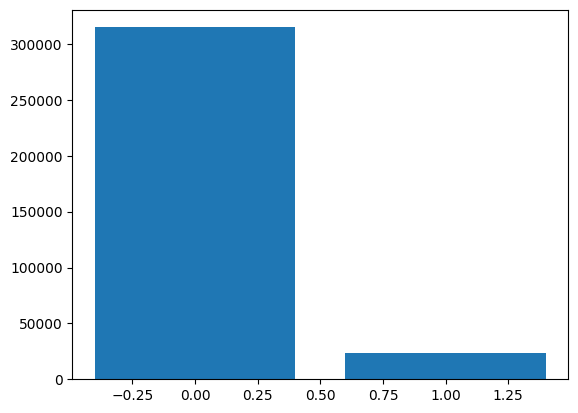

0.06954476833674558


In [5]:
numPosCases = StartingData[StartingData['result'] == 1].shape[0]
print(numPosCases)
numNegCases = StartingData[StartingData['result'] == 0].shape[0]
print(numNegCases)

pyplot.bar([0,1], [numNegCases, numPosCases])
pyplot.show()
print(numPosCases/(numPosCases+numNegCases))

In [6]:
train, test = train_test_split(StartingData, stratify=StartingData['result'], test_size=0.2)

In [7]:
#numPosCases = train[train['result'] == 1].shape[0]
#print(numPosCases)
#numNegCases = train[train['result'] == 0].shape[0]
#print(numNegCases)
#
#pyplot.bar([0,1], [numNegCases, numPosCases])
#pyplot.show()
#print(numPosCases/(numPosCases+numNegCases))

In [8]:
#numPosCases = test[test['result'] == 1].shape[0]
#print(numPosCases)
#numNegCases = test[test['result'] == 0].shape[0]
#print(numNegCases)
#
#pyplot.bar([0,1], [numNegCases, numPosCases])
#pyplot.show()
#print(numPosCases/(numPosCases+numNegCases))

### 1. Super basic: drop all missing values

In [9]:
dataClean1 = StartingData.dropna()
dataClean1.info()

dataClean2 = dataClean1.drop('user_address', axis=1)

dataClean2['exchange_a_volatility'].value_counts()
exAdict = {
    'very low' : 1,
    'low' : 2,
    'medium' : 3,
    'high' : 4,
    'very high' : 5
}
dataClean2['ex_a_vol_num'] = dataClean2['exchange_a_volatility'].apply(lambda x: exAdict[x])

dataClean3 = dataClean2.drop(['exchange_a_volatility', 'anonymous'], axis=1)
dataClean3.info()

train, test = train_test_split(dataClean3, stratify=dataClean3['result'], test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289060 entries, 8 to 3988964
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   user_address                      289060 non-null  object 
 1   user_balance_usd                  289060 non-null  float64
 2   user_balance_coin_a               289060 non-null  float64
 3   user_historical_transactions_10s  289060 non-null  int64  
 4   user_historical_transactions_30s  289060 non-null  int64  
 5   exchange_a_price                  289060 non-null  float64
 6   exchange_b_price                  289060 non-null  float64
 7   exchange_a_volatility             289060 non-null  object 
 8   exchange_b_volatility             289060 non-null  float64
 9   anonymous                         289060 non-null  object 
 10  result                            289060 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 26

In [10]:
train

,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_b_volatility,result,ex_a_vol_num
id,,,,,,,,,
3319114,59238.180348,587.735759,0,0,38.306370,38.2725,0.000579,0,1
3489234,35504.754347,1081.047151,0,0,42.368472,42.5271,0.000796,0,1
2818951,63145.500386,310.966558,0,0,44.986496,44.9169,0.000288,0,2
2801567,117823.415153,229.153474,0,0,51.182943,51.0321,0.000163,0,2
1167450,120340.624864,180.207906,0,0,51.182514,51.1287,0.000145,0,2
...,...,...,...,...,...,...,...,...,...
3803191,118687.942465,220.753919,0,0,53.297962,53.3295,0.000267,0,2
595938,98560.977607,380.953433,0,0,71.375700,71.5869,0.000968,0,3
3342063,118649.536850,197.708271,0,0,63.190445,63.1953,0.000538,0,2


In [11]:
test

,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_b_volatility,result,ex_a_vol_num
id,,,,,,,,,
359031,43953.762490,94.222235,0,0,41.474440,41.4687,0.000727,0,2
761289,40536.619899,570.925262,0,0,70.751929,70.5873,0.000462,0,2
2740009,81994.152661,1.590442,0,0,46.204467,46.1202,0.000824,0,2
1882818,32899.377571,379.531874,0,0,41.067844,41.0088,0.000457,0,2
2850384,32899.426940,379.556877,0,0,41.067844,41.0949,0.000274,0,2
...,...,...,...,...,...,...,...,...,...
2568808,33394.568021,508.626481,0,0,73.689137,72.9645,0.000734,0,5
2253209,115587.400434,256.363272,0,0,58.736275,58.5585,0.000341,0,4
2844933,54857.434750,168.769637,0,0,71.575175,71.7003,0.000515,0,2


In [12]:
#trainClean = train.dropna()
#trainClean.info()


In [13]:
ytrain = train['result']
xtrain = train.drop('result', axis=1)

ytest = test['result']
xtest = test.drop('result', axis=1)


In [14]:
xtrain

,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_b_volatility,ex_a_vol_num
id,,,,,,,,
3319114,59238.180348,587.735759,0,0,38.306370,38.2725,0.000579,1
3489234,35504.754347,1081.047151,0,0,42.368472,42.5271,0.000796,1
2818951,63145.500386,310.966558,0,0,44.986496,44.9169,0.000288,2
2801567,117823.415153,229.153474,0,0,51.182943,51.0321,0.000163,2
1167450,120340.624864,180.207906,0,0,51.182514,51.1287,0.000145,2
...,...,...,...,...,...,...,...,...
3803191,118687.942465,220.753919,0,0,53.297962,53.3295,0.000267,2
595938,98560.977607,380.953433,0,0,71.375700,71.5869,0.000968,3
3342063,118649.536850,197.708271,0,0,63.190445,63.1953,0.000538,2


In [15]:
ytrain

id
3319114    0
3489234    0
2818951    0
2801567    0
1167450    0
          ..
3803191    0
595938     0
3342063    0
2557221    0
430        0
Name: result, Length: 231248, dtype: int64

In [16]:
xtest

,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_b_volatility,ex_a_vol_num
id,,,,,,,,
359031,43953.762490,94.222235,0,0,41.474440,41.4687,0.000727,2
761289,40536.619899,570.925262,0,0,70.751929,70.5873,0.000462,2
2740009,81994.152661,1.590442,0,0,46.204467,46.1202,0.000824,2
1882818,32899.377571,379.531874,0,0,41.067844,41.0088,0.000457,2
2850384,32899.426940,379.556877,0,0,41.067844,41.0949,0.000274,2
...,...,...,...,...,...,...,...,...
2568808,33394.568021,508.626481,0,0,73.689137,72.9645,0.000734,5
2253209,115587.400434,256.363272,0,0,58.736275,58.5585,0.000341,4
2844933,54857.434750,168.769637,0,0,71.575175,71.7003,0.000515,2


In [17]:
ytest

id
359031     0
761289     0
2740009    0
1882818    0
2850384    0
          ..
2568808    0
2253209    0
2844933    0
623640     0
1612558    0
Name: result, Length: 57812, dtype: int64

In [18]:
ytest[ytest == 1]

id
259597     1
1496417    1
1125161    1
3796992    1
1206930    1
          ..
1454538    1
3408510    1
3485594    1
566823     1
3795520    1
Name: result, Length: 4015, dtype: int64

# Step 3: Model training

### 1. Super basic

Majority class
Precision: 0.93
Rcall: 1.00
F1-Score: 0.96
Minority class
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
The AUROC of our classifier is = 0.532
The accuracy of our classifier is = 0.931


/home/sebas/.virtualenvs/Hack1venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


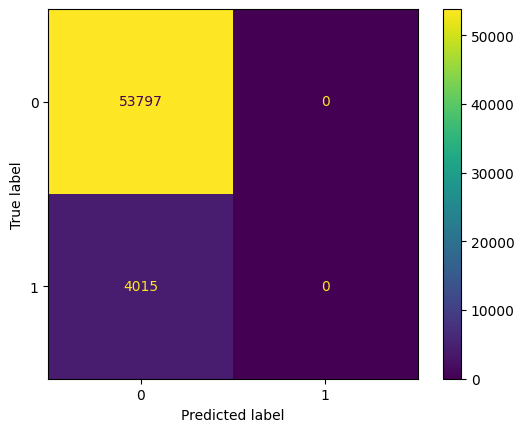

In [29]:
lr_base_clf = LogisticRegression()
lr_base_clf.fit(xtrain, ytrain)

y_pred = lr_base_clf.predict(xtest)

print("Majority class")
print("Precision: %.2f" % precision_score(ytest, y_pred, pos_label=0))
print("Rcall: %.2f" % recall_score(ytest, y_pred, pos_label=0))
print("F1-Score: %.2f" % f1_score(ytest, y_pred, pos_label=0))
print("==============")

print("Minority class")
print("Precision: %.2f" % precision_score(ytest, y_pred, pos_label=1))
print("Recall: %.2f" % recall_score(ytest, y_pred, pos_label=1))
print("F1-Score: %.2f" % f1_score(ytest, y_pred, pos_label=1))

cm = confusion_matrix(ytest, y_pred, labels=lr_base_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=lr_base_clf.classes_)
disp.plot();


predicted_proba = lr_base_clf.predict_proba(xtest)

roc_auc = roc_auc_score(y_score=predicted_proba[:,0], y_true=ytest)
print('The AUROC of our classifier is = %.3f' % roc_auc)

accuracy = accuracy_score(y_pred=y_pred, y_true=ytest)
print('The accuracy of our classifier is = %.3f' % accuracy)

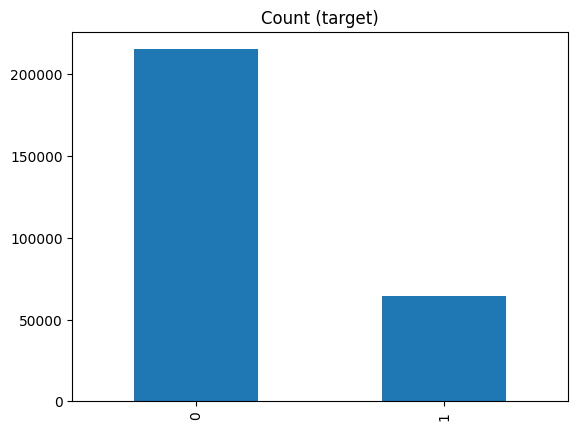

In [20]:
smote_sampler = SMOTE(sampling_strategy=0.3)
X_smote, y_smote = smote_sampler.fit_resample(xtrain, ytrain)

df = pd.DataFrame(X_smote)
df['target'] = y_smote
df.target.value_counts().plot(kind='bar', title='Count (target)');

In [21]:
X_smote = X_smote.drop('target', axis=1)

Majority class
Precision: 0.93
Recall: 1.00
F1-Score: 0.96
Minority class
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
The AUROC of our classifier is = 0.496


/home/sebas/.virtualenvs/Hack1venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


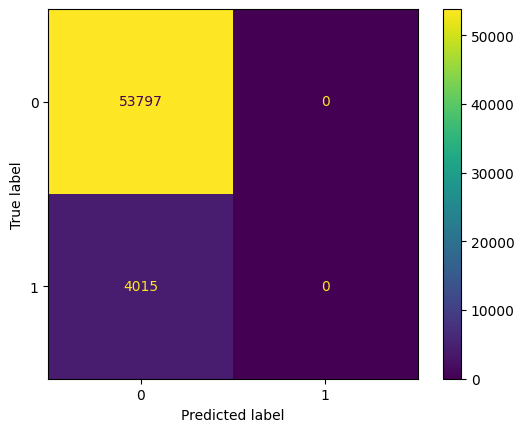

In [22]:
lr_clf_smote = LogisticRegression(random_state=42)
lr_clf_smote.fit(X_smote, y_smote)
#xtest['target'] = ytest #tirar?
y_pred = lr_clf_smote.predict(xtest)

print("Majority class")
print("Precision: %.2f" % precision_score(ytest, y_pred, pos_label=0))
print("Recall: %.2f" % recall_score(ytest, y_pred, pos_label=0))
print("F1-Score: %.2f" % f1_score(ytest, y_pred, pos_label=0))
print("==============")

print("Minority class")
print("Precision: %.2f" % precision_score(ytest, y_pred, pos_label=1))
print("Recall: %.2f" % recall_score(ytest, y_pred, pos_label=1))
print("F1-Score: %.2f" % f1_score(ytest, y_pred, pos_label=1))


cm = confusion_matrix(ytest, y_pred, labels=lr_base_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=lr_base_clf.classes_)
disp.plot();



predicted_proba = lr_clf_smote.predict_proba(xtest)

roc_auc = roc_auc_score(y_score=predicted_proba[:,0], y_true=ytest)
print('The AUROC of our classifier is = %.3f' % roc_auc)

Logistic Regression

In [23]:
tTrain, tVal = train_test_split(train, stratify=train['result'], test_size=0.25)

In [24]:
tTrain

,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_b_volatility,result,ex_a_vol_num
id,,,,,,,,,
1107311,131385.530283,0.123328,0,0,46.987088,46.5885,0.000528,0,4
1065189,74794.654162,158.244251,0,0,44.311995,44.0748,0.000379,0,2
3289327,112941.948478,321.811693,0,0,54.159731,54.2325,0.000229,0,2
581152,34068.681084,351.746133,0,0,73.076512,72.8889,0.001015,0,4
2578920,55924.399923,455.950945,0,0,45.401212,45.3726,0.000739,0,2
...,...,...,...,...,...,...,...,...,...
1658055,60489.384295,909.803798,0,0,73.506850,73.2711,0.000143,0,3
1800018,61661.647085,269.396351,0,0,52.004211,52.0107,0.000491,0,2
88830,81464.466697,0.579904,0,0,36.987249,36.6261,0.000521,0,1


In [25]:
tVal

,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_b_volatility,result,ex_a_vol_num
id,,,,,,,,,
2830253,102263.577412,482.874894,0,0,59.729944,59.7765,0.000334,0,2
2008598,112686.766577,289.833107,0,0,64.716131,64.6989,0.000223,0,2
1511410,80941.725718,113.694541,0,0,66.566190,399.8610,0.000058,0,2
3619337,100589.125773,353.692650,0,0,65.343394,65.3835,0.000285,0,2
1341442,53459.620620,1034.652352,0,0,71.551725,71.3097,0.001081,0,2
...,...,...,...,...,...,...,...,...,...
2298446,84850.324120,588.184567,0,0,65.784199,65.6355,0.000110,0,2
1464724,60126.776689,110.441647,0,0,72.678050,72.7419,0.000811,0,2
3785585,53380.463099,1045.386798,0,0,47.242093,47.2752,0.000246,0,2


In [26]:
test

,user_balance_usd,user_balance_coin_a,user_historical_transactions_10s,user_historical_transactions_30s,exchange_a_price,exchange_b_price,exchange_b_volatility,result,ex_a_vol_num
id,,,,,,,,,
359031,43953.762490,94.222235,0,0,41.474440,41.4687,0.000727,0,2
761289,40536.619899,570.925262,0,0,70.751929,70.5873,0.000462,0,2
2740009,81994.152661,1.590442,0,0,46.204467,46.1202,0.000824,0,2
1882818,32899.377571,379.531874,0,0,41.067844,41.0088,0.000457,0,2
2850384,32899.426940,379.556877,0,0,41.067844,41.0949,0.000274,0,2
...,...,...,...,...,...,...,...,...,...
2568808,33394.568021,508.626481,0,0,73.689137,72.9645,0.000734,0,5
2253209,115587.400434,256.363272,0,0,58.736275,58.5585,0.000341,0,4
2844933,54857.434750,168.769637,0,0,71.575175,71.7003,0.000515,0,2


# Step 4: Evaluate results